In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
#planets
url_planets = "http://swapi.dev/api/planets/"
planets_response = requests.get(url_planets).json()
print(json.dumps(planets_response, indent=2, sort_keys=True))

{
  "count": 60,
  "next": "http://swapi.dev/api/planets/?page=2",
  "previous": null,
  "results": [
    {
      "climate": "arid",
      "created": "2014-12-09T13:50:49.641000Z",
      "diameter": "10465",
      "edited": "2014-12-20T20:58:18.411000Z",
      "films": [
        "http://swapi.dev/api/films/1/",
        "http://swapi.dev/api/films/3/",
        "http://swapi.dev/api/films/4/",
        "http://swapi.dev/api/films/5/",
        "http://swapi.dev/api/films/6/"
      ],
      "gravity": "1 standard",
      "name": "Tatooine",
      "orbital_period": "304",
      "population": "200000",
      "residents": [
        "http://swapi.dev/api/people/1/",
        "http://swapi.dev/api/people/2/",
        "http://swapi.dev/api/people/4/",
        "http://swapi.dev/api/people/6/",
        "http://swapi.dev/api/people/7/",
        "http://swapi.dev/api/people/8/",
        "http://swapi.dev/api/people/9/",
        "http://swapi.dev/api/people/11/",
        "http://swapi.dev/api/people/43

In [21]:
planet_names = []
planet_terrains = []
planet_climates = []
planet_populations = []
planet_diameters = []
planet_films = []


pages = ["1", "2", "3", "4", "5", "6"]
find_planet_url = f"http://swapi.dev/api/planets/?page="

for page_number in pages:
    find_planets_response = requests.get(find_planet_url + page_number).json()
    
#for loop to list names in films
    for planets in find_planets_response["results"]:
        planet_name = planets["name"]
        planet_names.append(planet_name)
        planet_terrain = planets["terrain"]
        planet_terrains.append(planet_terrain)
        planet_climate = planets["climate"]
        planet_climates.append(planet_climate)
        planet_population = planets["population"]
        planet_populations.append(planet_population)
        planet_diameter = planets["diameter"]
        planet_diameters.append(planet_diameter)
        planet_film = planets["films"]
        planet_films.append(planet_film)
        planet_count = len(planet_names)
        print(f'{planet_count} planets found! {planet_name} has a population of: {planet_population}. Films: {planet_film}')

1 planets found! Tatooine has a population of: 200000. Films: ['http://swapi.dev/api/films/1/', 'http://swapi.dev/api/films/3/', 'http://swapi.dev/api/films/4/', 'http://swapi.dev/api/films/5/', 'http://swapi.dev/api/films/6/']
2 planets found! Alderaan has a population of: 2000000000. Films: ['http://swapi.dev/api/films/1/', 'http://swapi.dev/api/films/6/']
3 planets found! Yavin IV has a population of: 1000. Films: ['http://swapi.dev/api/films/1/']
4 planets found! Hoth has a population of: unknown. Films: ['http://swapi.dev/api/films/2/']
5 planets found! Dagobah has a population of: unknown. Films: ['http://swapi.dev/api/films/2/', 'http://swapi.dev/api/films/3/', 'http://swapi.dev/api/films/6/']
6 planets found! Bespin has a population of: 6000000. Films: ['http://swapi.dev/api/films/2/']
7 planets found! Endor has a population of: 30000000. Films: ['http://swapi.dev/api/films/3/']
8 planets found! Naboo has a population of: 4500000000. Films: ['http://swapi.dev/api/films/3/', 'ht

In [22]:
planet_df = pd.DataFrame({"Name": planet_names, 
                            "Population": planet_populations,
                            "Terrains": planet_terrains,
                            "Climates": planet_climates,
                            "Diameter": planet_diameters,
                            "Films": planet_films
                            })
planet_df

,Name,Population,Terrains,Climates,Diameter,Films
0,Tatooine,200000,desert,arid,10465,"[http://swapi.dev/api/films/1/, http://swapi.d..."
1,Alderaan,2000000000,"grasslands, mountains",temperate,12500,"[http://swapi.dev/api/films/1/, http://swapi.d..."
2,Yavin IV,1000,"jungle, rainforests","temperate, tropical",10200,[http://swapi.dev/api/films/1/]
3,Hoth,unknown,"tundra, ice caves, mountain ranges",frozen,7200,[http://swapi.dev/api/films/2/]
4,Dagobah,unknown,"swamp, jungles",murky,8900,"[http://swapi.dev/api/films/2/, http://swapi.d..."
5,Bespin,6000000,gas giant,temperate,118000,[http://swapi.dev/api/films/2/]
6,Endor,30000000,"forests, mountains, lakes",temperate,4900,[http://swapi.dev/api/films/3/]
7,Naboo,4500000000,"grassy hills, swamps, forests, mountains",temperate,12120,"[http://swapi.dev/api/films/3/, http://swapi.d..."
8,Coruscant,1000000000000,"cityscape, mountains",temperate,12240,"[http://swapi.dev/api/films/3/, http://swapi.d..."
9,Kamino,1000000000,ocean,temperate,19720,[http://swapi.dev/api/films/5/]


In [38]:
#create new df and drop "unknowns" in Population column
population_planet_df = planet_df.drop(planet_df[planet_df['Population'] == 'unknown'].index)
population_planet_df = population_planet_df.reset_index(drop=True)
population_planet_df

,Name,Population,Terrains,Climates,Diameter,Films
0,Tatooine,200000,desert,arid,10465,"[http://swapi.dev/api/films/1/, http://swapi.d..."
1,Alderaan,2000000000,"grasslands, mountains",temperate,12500,"[http://swapi.dev/api/films/1/, http://swapi.d..."
2,Yavin IV,1000,"jungle, rainforests","temperate, tropical",10200,[http://swapi.dev/api/films/1/]
3,Bespin,6000000,gas giant,temperate,118000,[http://swapi.dev/api/films/2/]
4,Endor,30000000,"forests, mountains, lakes",temperate,4900,[http://swapi.dev/api/films/3/]
5,Naboo,4500000000,"grassy hills, swamps, forests, mountains",temperate,12120,"[http://swapi.dev/api/films/3/, http://swapi.d..."
6,Coruscant,1000000000000,"cityscape, mountains",temperate,12240,"[http://swapi.dev/api/films/3/, http://swapi.d..."
7,Kamino,1000000000,ocean,temperate,19720,[http://swapi.dev/api/films/5/]
8,Geonosis,100000000000,"rock, desert, mountain, barren","temperate, arid",11370,[http://swapi.dev/api/films/5/]
9,Utapau,95000000,"scrublands, savanna, canyons, sinkholes","temperate, arid, windy",12900,[http://swapi.dev/api/films/6/]


In [36]:
population_planet_count = len(population_planet_df["Population"])
print(population_planet_count)

43


In [58]:
#for loop to change population strings into integer values
for i in range(0, len(population_planet_df["Population"])):
    population_planet_df["Population"][i] = int(population_planet_df["Population"][i])


ValueError: invalid literal for int() with base 10: 'unknown'

In [43]:
#sort Population by descending order
population_planet_df = population_planet_df.sort_values(["Population"], ascending=False)
population_planet_df = population_planet_df.reset_index(drop=True)
population_planet_df

,Name,Population,Terrains,Climates,Diameter,Films
0,Coruscant,1000000000000,"cityscape, mountains",temperate,12240,"[http://swapi.dev/api/films/3/, http://swapi.d..."
1,Skako,500000000000,"urban, vines",temperate,unknown,[]
2,Geonosis,100000000000,"rock, desert, mountain, barren","temperate, arid",11370,[http://swapi.dev/api/films/5/]
3,Mon Cala,27000000000,"oceans, reefs, islands",temperate,11030,[]
4,Eriadu,22000000000,cityscape,polluted,13490,[]
5,Sullust,18500000000,"mountains, volcanoes, rocky deserts",superheated,12780,[]
6,Nal Hutta,7000000000,"urban, oceans, swamps, bogs",temperate,12150,[]
7,Muunilinst,5000000000,"plains, forests, hills, mountains",temperate,13800,[]
8,Naboo,4500000000,"grassy hills, swamps, forests, mountains",temperate,12120,"[http://swapi.dev/api/films/3/, http://swapi.d..."
9,Kalee,4000000000,"rainforests, cliffs, canyons, seas","arid, temperate, tropical",13850,[]


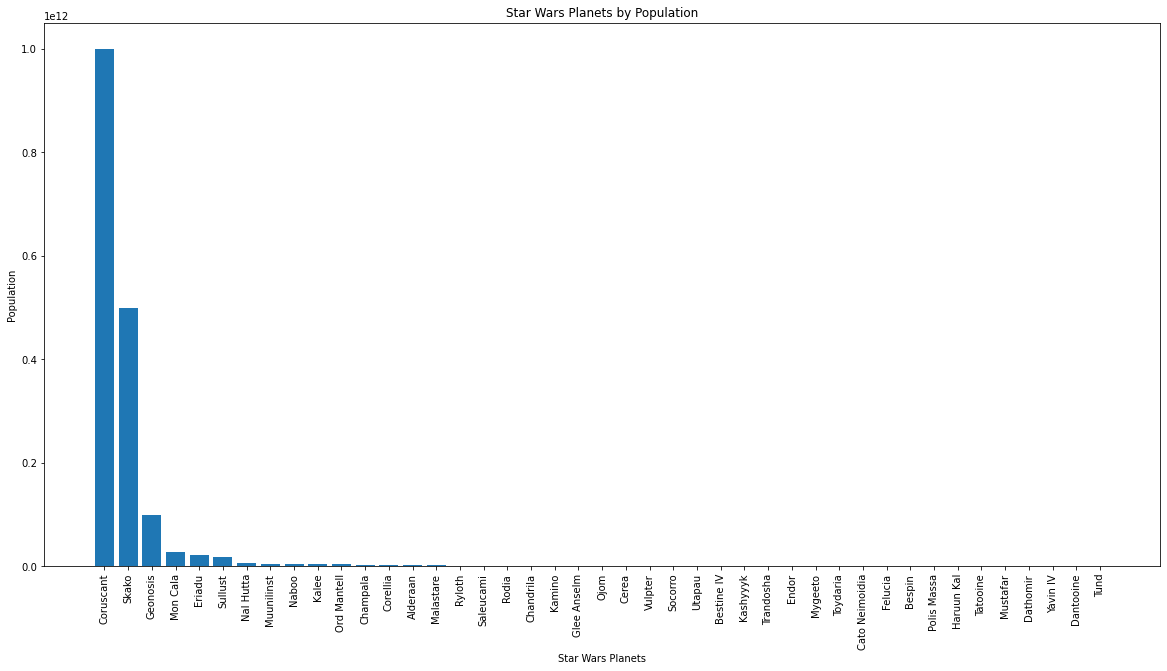

In [44]:
x_axis = population_planet_df["Name"]
y_axis = population_planet_df["Population"]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20, 10))
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.title("Star Wars Planets by Population")
plt.xlabel("Star Wars Planets")
plt.ylabel("Population")
#plt.tight_layout()
plt.show()

In [59]:
pop_diameter_df = population_planet_df.drop(population_planet_df[population_planet_df['Diameter'] == 'unknown'].index)
pop_diameter_df = pop_diameter_df.drop(pop_diameter_df[pop_diameter_df['Diameter'] == '0'].index)
pop_diameter_df = pop_diameter_df.reset_index(drop=True)
for i in range(0, len(pop_diameter_df["Diameter"])):
    pop_diameter_df["Diameter"][i] = int(pop_diameter_df["Diameter"][i])
    break
pop_diameter_df

,Name,Population,Terrains,Climates,Diameter,Films
0,Coruscant,1000000000000,"cityscape, mountains",temperate,12240,"[http://swapi.dev/api/films/3/, http://swapi.d..."
1,Geonosis,100000000000,"rock, desert, mountain, barren","temperate, arid",11370,[http://swapi.dev/api/films/5/]
2,Mon Cala,27000000000,"oceans, reefs, islands",temperate,11030,[]
3,Eriadu,22000000000,cityscape,polluted,13490,[]
4,Sullust,18500000000,"mountains, volcanoes, rocky deserts",superheated,12780,[]
5,Nal Hutta,7000000000,"urban, oceans, swamps, bogs",temperate,12150,[]
6,Muunilinst,5000000000,"plains, forests, hills, mountains",temperate,13800,[]
7,Naboo,4500000000,"grassy hills, swamps, forests, mountains",temperate,12120,"[http://swapi.dev/api/films/3/, http://swapi.d..."
8,Kalee,4000000000,"rainforests, cliffs, canyons, seas","arid, temperate, tropical",13850,[]
9,Ord Mantell,4000000000,"plains, seas, mesas",temperate,14050,[http://swapi.dev/api/films/2/]


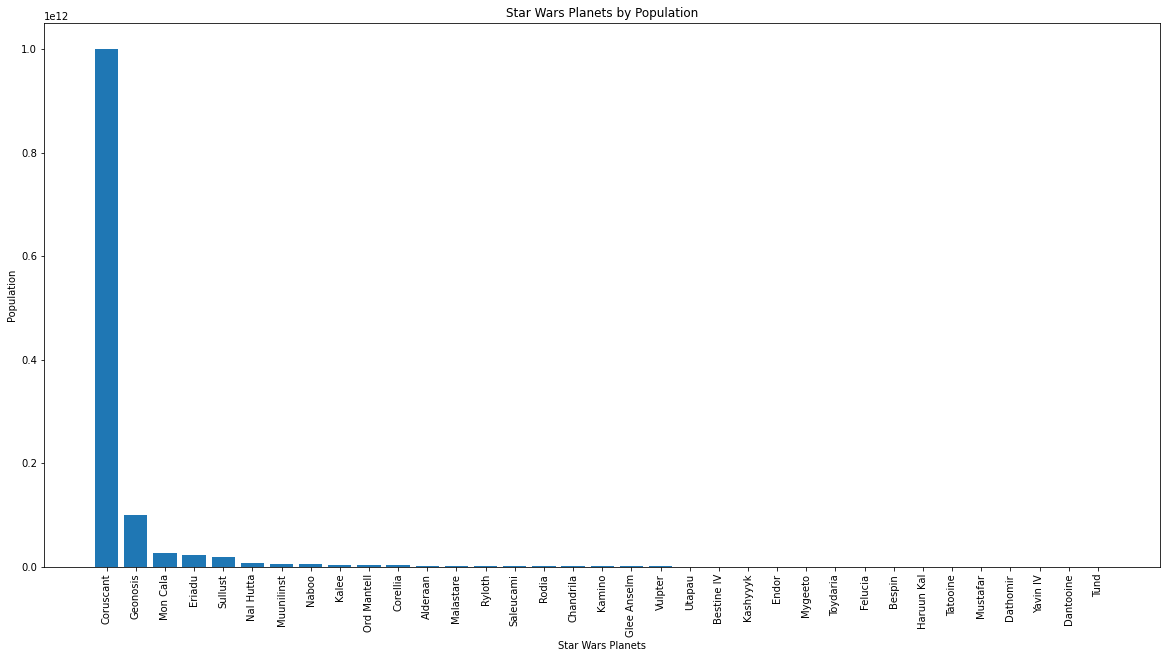

In [60]:
x_axis = pop_diameter_df["Name"]
y_axis = pop_diameter_df["Population"]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20, 10))
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.title("Star Wars Planets by Population")
plt.xlabel("Star Wars Planets")
plt.ylabel("Population")
#plt.tight_layout()
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

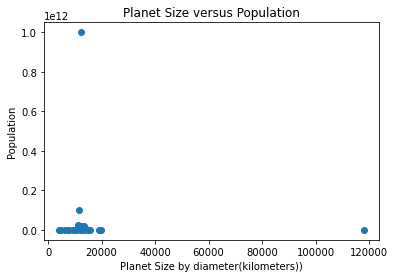

In [61]:
x_values = pop_diameter_df["Diameter"]
y_values = pop_diameter_df["Population"]
plt.scatter(x_values, y_values)
plt.title("Planet Size versus Population")
plt.xlabel("Planet Size by diameter(kilometers))")
plt.ylabel("Population")
plt.plot

In [68]:
pop_dia_no_outlier_df = pop_diameter_df.drop([0])
pop_dia_no_outlier_df = pop_dia_no_outlier_df.sort_values(["Diameter"], ascending=False)
pop_dia_no_outlier_df

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

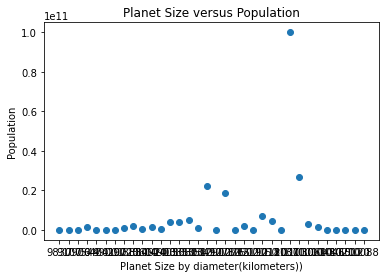

In [69]:
x_values = pop_dia_no_outlier_df["Diameter"]
y_values = pop_dia_no_outlier_df["Population"]
plt.scatter(x_values, y_values)
plt.title("Planet Size versus Population")
plt.xlabel("Planet Size by diameter(kilometers))")
plt.ylabel("Population")
plt.plot
